In [9]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [10]:
from google.colab import auth
auth.authenticate_user()

The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
  * https://github.com/tensorflow/io (for I/O related ops)
If you depend on functionality not listed there, please file an issue.



In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.special import expit
import tqdm

In [0]:
class NeuralNetwork:
  # initialise the NN
  def __init__(self, input_nodes, hidden_nodes, output_nodes, learning_rate):
    self.inodes = input_nodes
    self.hnodes = hidden_nodes
    self.onodes = output_nodes
    self.lrate = learning_rate
    # we also need to define the weight matrix based on the total number of 
    # nodes that we have in the network
    # shapes of the weight matrix is given by (hidden_nodes, input_nodes) and (output_nodes, hidden_nodes)
    # let's define the weight matrix between the input and hidden layers and call it wih
    # basically we are sampling the weights from a normal distribution (why? search the internet)
    self.wih = np.random.normal(0.0, pow(self.hnodes, -0.5), (self.hnodes, self.inodes))
    self.who = np.random.normal(0.0, pow(self.onodes, -0.5), (self.onodes, self.hnodes))

    # let's set the activation function
    self.activation_function = lambda x : expit(x)
    pass

  # train the neural network
  def train(self, input_list, output_list):
    # we haven't mention the epochs
    inputs = np.array(input_list, ndmin=2).T
    targets = np.array(output_list, ndmin=2).T

    # forward propagation
    # calculate the signal for the hidden layer or netj
    hidden_inputs = np.dot(self.wih, inputs)
    # calculate the output after applying the activation oj
    hidden_outputs = self.activation_function(hidden_inputs)

    # calculate the input for the output nodes (layer)
    final_inputs = np.dot(self.who, hidden_outputs)
    # calculate the final outputs
    final_outputs = self.activation_function(final_inputs)
    # error
    output_errors = targets - final_outputs
    # let's compute the error for the hidden layers
    hidden_errors = np.dot(self.who.T, output_errors)
    
    # For the weights between the hidden and final layers, we use the o​utput_errors
    # For the weights between the input and hidden layers, we use these h​idden_errors ​we just calculated.
    # updation of the weights for the hidden and output layers
    self.who += self.lrate * np.dot((output_errors * final_outputs * (1 - final_outputs)), np.transpose(hidden_outputs)) 
    # updation of the weights for the input and hidden layers
    self.wih += self.lrate * np.dot((hidden_errors * hidden_outputs * (1 - hidden_outputs)), np.transpose(inputs))
    pass

  # given some data give the result (prediction phase)
  def query(self, input_list):
    inputs = np.array(input_list, ndmin=2).T
    # calculate the signal for the hidden layer or netj
    hidden_inputs = np.dot(self.wih, inputs)
    # calculate the output after applying the activation oj
    hidden_outputs = self.activation_function(hidden_inputs)

    # calculate the input for the output nodes (layer)
    final_inputs = np.dot(self.who, hidden_outputs)
    # calculate the final outputs
    final_outptus = self.activation_function(final_inputs)
    return final_outptus

    pass

In [0]:
# Testing what we've done so far
# let's create a neural network of what we have done so far
# input_nodes = 3
# output_nodes = 3
# hidden_nodes = 3
# learning_rate = 0.01
# initialise a neural network
# nn = NeuralNetwork(input_nodes, hidden_nodes, output_nodes, learning_rate)

In [0]:
# let's test our query 
# nn.query([1, 2.0, -9.2])

In [0]:
# load the dataset from the google drive
with open('/content/drive/My Drive/Colab Notebooks/Dataset/mnist_train.csv') as f:
  data = f.readlines()

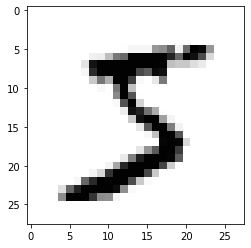

In [66]:
# visualise the dataset
all_values = data[0].split(',')
image_array = np.asfarray(all_values[1:]).reshape(28, 28)
plt.imshow(image_array, cmap='Greys', interpolation=None)
plt.show()

# Preparing the MNIST dataset
we want to rescale the values which is currently between (0,255) to (0.01,1) so that the activation do not saturate, not 0 though because most of the values in the image are 0 only and this won't help neural network learn anything at all

In [0]:
# the below operation will basically scale and shift things
scaled_input = (image_array / 255.0) * 0.99 + 0.01

Let's talk about preprocessing the data, well our model needs to output the label but it won't just output 5 or 6 it will output the results in form of arrays or we can say one hot encoding, how?<br>
We'll a 0 will be represented as follows [1, 0, 0, 0, ... 0] and a 5 will be represented as [0, 0, 0, 0, 0, 1, 0, .. ]. But there is a problem here the sigmoid can't achieve 0 or complete 1 because that is attainable only at extremes that will make the model unstable so instead we can represent 0 as 0.01 and 1 as 0.99<br>
Thus there will be 10 output nodes that's for sure

In [0]:
# let's see how will be covert a single label to one hot encoding
onodes = 10 # total output nodes
targets = np.zeros(onodes) + 0.01 # initialise all those to 0.01
targets[int(all_values[0])] = 0.99 # we're basically extracting the labels

In [69]:
print(targets)

[0.01 0.01 0.01 0.01 0.01 0.99 0.01 0.01 0.01 0.01]


In [0]:
# let's set the parameters for our neural network for this dataset
# nodes specification
input_nodes = 784
hidden_nodes = 100
output_nodes = 10
# learning rate
learning_rate = 0.3

neural_net = NeuralNetwork(input_nodes, hidden_nodes, output_nodes, learning_rate)

In [0]:
# let's train the neural network
for record in data:
  # split the record by ','
  all_values = record.split(',')
  # scale and shift the inputs but don't consider the label
  inputs = (np.asfarray(all_values[1:]) / 255.0) * 0.09 + 0.01
  targets = np.zeros(output_nodes) + 0.01
  targets[int(all_values[0])] = 0.99
  neural_net.train(inputs, targets)
  pass


# Testing the Network

In [0]:
tdata = np.loadtxt('/content/drive/My Drive/Colab Notebooks/Dataset/test.csv', skiprows=1, dtype=int, delimiter=',')

In [81]:
np.shape(tdata)

(28000, 784)

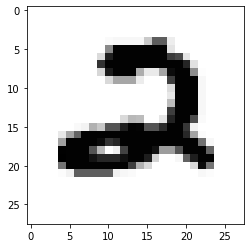

In [84]:
# let's first see the test set for visualisation purposes
all_values = tdata[0]
image_array = np.asfarray(all_values).reshape(28,28)
plt.imshow(image_array, cmap='Greys', interpolation=None)
plt.show()

In [87]:
# it is clearly 7, let's see what our model outputs
outputs = neural_net.query((np.asfarray(all_values) / 255.0) * 0.99 + 0.01)
print(np.argmax(outputs))

2


In [0]:
# let's loop over the complete testing dataset
results = ['ImageId,Label']
for i, record in enumerate(tdata):
  inputs = (np.asfarray(record) / 255.0) * 0.99 + 0.01
  outputs = neural_net.query(inputs)
  label = np.argmax(outputs)
  results.append(str(i + 1) + ',' + str(label))

In [92]:
results[0:10]

['ImageId,Label',
 '1,2',
 '2,0',
 '3,9',
 '4,9',
 '5,3',
 '6,7',
 '7,0',
 '8,3',
 '9,0']

In [0]:
with open('/content/drive/My Drive/Colab Notebooks/Dataset/results.txt', 'w') as f:
  for item in results:
    f.write('%s\n' % item)

let's Measure the accuracy

In [55]:
# we'll go through all the records present in the test
scorecard = []
# we'll append 1 if the labels matches otherwise 0
for record in tdata:
  all_values = record.split(',')
  # correct answer
  print('correct answer: ', int(all_values[0]))
  # shifting and scaling
  inputs = (np.asfarray(all_values[1:]) / 255.0) * 0.99 + 0.01
  outputs = neural_net.query(inputs)
  # index of the highest value correspond to the label, we'll use argmax
  label = np.argmax(outputs)
  print("Network answer: ", label)
  if(label == int(all_values[0])):
    scorecard.append(1)
  else:
    scorecard.append(0)
  print('')

correct answer:  7
Network answer:  7

correct answer:  2
Network answer:  0

correct answer:  1
Network answer:  1

correct answer:  0
Network answer:  0

correct answer:  4
Network answer:  0

correct answer:  1
Network answer:  8

correct answer:  4
Network answer:  9

correct answer:  9
Network answer:  3

correct answer:  5
Network answer:  0

correct answer:  9
Network answer:  0



In [56]:
print(scorecard)

[1, 0, 1, 1, 0, 0, 0, 0, 0, 0]
